In [94]:
# Importing the packages
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import seaborn as sns
import sklearn
import random
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay

In [95]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [96]:
# Importing the dataset
df = pd.read_csv('dataset_phishing.csv')
df.drop(['url'], axis=1, inplace=True)
#df.head(50)


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.000000,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.400000,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.000000,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.000000,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate
5,32,24,0,3,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,0,0,0,1,0,4,3,3,3,0,7,7,0,4.500000,4.500000,0.000000,0,0,0,0,0,0,10,0.300000,0.700000,0,0,0,0.571429,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,1,0,-1,0,0,1,0,phishing
6,19,12,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,5,5,0,4.000000,4.000000,0.000000,0,0,0,0,0,0,98,0.081633,0.918367,0,10,0,0.000000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,100.000000,0,0,0,0,1,0,170,7529,0,0,0,1,legitimate
7,81,27,1,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.259259,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,5,8,2,3,2,32,19,32,13.200000,11.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,76,5767,0,0,1,2,phishing
8,42,34,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,1,0,0,0,2,0,8,8,0,21,21,0,14.500000,14.500000,0.000000,0,1,0,0,0,0,63,0.206349,0.793651,0,3,0,0.380000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,27.272727,0,0,0,1,1,0,371,7298,0,0,0,5,legitimate
9,104,10,0,1,10,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0.076923,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,14,0,2,6,2,10,6,10,5.571429,6.000000,5.538462,1,0,0,0,0,0,140,0.778571,0.221429,0,1

In [97]:
df.shape

(11430, 88)

In [98]:
# if your dataset contains missing value, check which column has missing values
#df.isnull().sum()

length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_subdomain              0
abnormal

In [99]:
#df.dropna(inplace=True)

In [100]:
from sklearn import preprocessing


col = [df.columns[-1]]

lab_en= preprocessing.LabelEncoder()

for c in col:
    df[c]= lab_en.fit_transform(df[c])

#df.head(50)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.000000,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.400000,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.000000,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.000000,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,0
5,32,24,0,3,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,0,0,0,1,0,4,3,3,3,0,7,7,0,4.500000,4.500000,0.000000,0,0,0,0,0,0,10,0.300000,0.700000,0,0,0,0.571429,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,1,0,-1,0,0,1,0,1
6,19,12,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,5,5,0,4.000000,4.000000,0.000000,0,0,0,0,0,0,98,0.081633,0.918367,0,10,0,0.000000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,100.000000,0,0,0,0,1,0,170,7529,0,0,0,1,0
7,81,27,1,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.259259,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,5,8,2,3,2,32,19,32,13.200000,11.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,76,5767,0,0,1,2,1
8,42,34,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,1,0,0,0,2,0,8,8,0,21,21,0,14.500000,14.500000,0.000000,0,1,0,0,0,0,63,0.206349,0.793651,0,3,0,0.380000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,27.272727,0,0,0,1,1,0,371,7298,0,0,0,5,0
9,104,10,0,1,10,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0.076923,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,14,0,2,6,2,10,6,10,5.571429,6.000000,5.538462,1,0,0,0,0,0,140,0.778571,0.221429,0,1,0,0.193548,0,0.000000,0,1,93.103448,0,10.000000,90.000000,0,0,0,58.13953

In [101]:
##print(df.corr()['Result'].sort_values())
## correlation values of features with target label
corr_col = abs(df.corr()['status']).sort_values(ascending=False)
corr_col = corr_col.rename_axis('Col').reset_index(name='Correlation')
corr_col

KeyboardInterrupt: 

In [ ]:
def correlation (corr_col, threshold):
	corr_feature = set()
	for i, row in corr_col.iterrows():
		if row['Correlation'] < threshold or np.isnan(row['Correlation']):
			corr_feature.add(row['Col'])
	return corr_feature

In [ ]:
corr_feature = correlation(corr_col,.003)
len(set(corr_feature))


7

In [ ]:
corr_feature

{'nb_or',
 'path_extension',
 'ratio_intErrors',
 'ratio_intRedirection',
 'ratio_nullHyperlinks',
 'sfh',
 'submit_email'}

In [ ]:
df.drop(corr_feature, axis=1, inplace=True)

In [ ]:
# # Remove features having correlation coeff. between +/- 0.03
# df.drop(['Favicon','Iframe','Redirect',
#                 'popUpWidnow','RightClick','Submitting_to_email'], axis=1, inplace=True)


In [ ]:
len(df.columns)


81

In [ ]:
a=len(df[df.status==0])
b=len(df[df.status==1])


In [ ]:
print("Count of Legitimate Websites = ", a)
print("Count of Phishy Websites = ", b)

Count of Legitimate Websites =  5715
Count of Phishy Websites =  5715


In [ ]:
#df.corr()

In [ ]:
# #Using Pearson Correlation
# plt.figure(figsize=(30,30))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [ ]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (abs(corr_matrix.iloc[i, j]) > threshold): # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
                
#     return col_corr

In [ ]:
# corr_features = correlation(df, .7)
# len(set(corr_features))

In [ ]:
# corr_features

In [ ]:
#from sklearn import preprocessing


# col =df[df.columns[:]]

# lab_en= preprocessing.LabelEncoder()

# for c in col:
#     df[c]= lab_en.fit_transform(df[c])

# df.head()

In [ ]:
X = df.drop(['status'], axis=1, inplace=False)
#X.head(50)
#same work
##inplace true modifies the og data & does not return anything
##inplace false does not modify og data but returns something whoch we store in a var
# X= df.drop(columns='Result')
# X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.000000,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,100.000000,0.000000,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.400000,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.000000,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,96.428571,3.571429,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.000000,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0.000000,100.000000,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6
5,32,24,0,3,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,0,0,1,0,4,3,3,3,0,7,7,0,4.500000,4.500000,0.000000,0,0,0,0,0,0,10,0.300000,0.700000,0,0.571429,0.000000,0,0,100.000000,0.000000,0.000000,0,0,0.000000,0,0,0,1,1,1,0,-1,0,0,1,0
6,19,12,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,1,0,2,3,3,3,0,5,5,0,4.000000,4.000000,0.000000,0,0,0,0,0,0,98,0.081633,0.918367,10,0.000000,0.000000,0,1,0.000000,0.000000,100.000000,0,0,100.000000,0,0,0,0,1,0,170,7529,0,0,0,1
7,81,27,1,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.259259,0.000000,0,0,0,0,0,2,0,0,0,1,0,5,8,2,3,2,32,19,32,13.200000,11.000000,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,0,0,100.000000,0,0,0,1,0,0,76,5767,0,0,1,2
8,42,34,0,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,1,0,0,2,0,8,8,0,21,21,0,14.500000,14.500000,0.000000,0,1,0,0,0,0,63,0.206349,0.793651,3,0.380000,0.000000,0,1,0.000000,0.000000,100.000000,0,0,27.272727,0,0,0,1,1,0,371,7298,0,0,0,5
9,104,10,0,1,10,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0.076923,0.000000,0,0,0,0,0,1,0,0,0,0,0,14,0,2,6,2,10,6,10,5.571429,6.000000,5.538462,1,0,0,0,0,0,140,0.778571,0.221429,1,0.193548,0.000000,0,1,93.103448,10.000000,90.000000,0,0,58.139535,0,0,0,1,0,0,128,9368,6774,0,0,5


In [ ]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,100.000000,0.000000,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,96.428571,3.571429,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0.000000,100.000000,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
y = df['status']
y = pd.DataFrame(y)
#y.head()

,status
0,0
1,1
2,1
3,0
4,0


In [ ]:
# separate dataset into train and test
from cProfile import label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=10,
    stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 80), (2286, 80), (9144, 1), (2286, 1))

In [ ]:
#X_test.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
3487,20,12,0,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,2,4,3,3,0,5,5,0,4.000000,4.00,0.000000,0,0,0,0,0,0,2,1.000000,0.000000,0,0.000000,0.000000,0,0,0.0,100.0,0.0,0,0,0.0,0,0,0,0,0,0,0,-1,0,0,0,0
4721,63,14,0,3,2,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0.015873,0.071429,0,0,0,0,0,3,1,0,0,0,0,8,2,3,10,3,10,10,9,5.375000,10.00,4.714286,1,0,0,0,0,0,7,0.857143,0.142857,0,1.000000,0.000000,0,0,100.0,0.0,0.0,0,0,0.0,0,0,0,1,0,0,64,302,83261,0,1,3
11422,25,17,0,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,0,1,0,1,1,13,13,0,13,13,0,13.000000,13.00,0.000000,0,0,0,0,0,0,139,0.978417,0.021583,0,0.000000,0.000000,0,0,80.0,100.0,0.0,0,0,100.0,0,0,0,0,0,0,144,2778,788648,0,0,2
2415,68,15,0,2,1,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,1,1,0,1,0,6,1,2,8,2,15,8,15,8.000000,8.00,8.000000,3,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0,0,0.0,0,0,1,1,0,1,0,-1,0,0,1,2
6421,178,26,1,4,8,0,2,1,2,0,0,0,5,0,3,0,0,0,0,0,0,0,0,0,0.191011,0.000000,0,0,0,0,0,3,0,0,0,0,0,21,5,1,2,1,16,7,16,6.904762,4.75,7.411765,0,0,1,0,0,0,31,0.612903,0.387097,2,0.166667,0.166667,1,1,60.0,0.0,100.0,0,0,100.0,0,0,0,1,1,0,144,2777,0,0,1,0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

col_X_train = [X_train.columns[:]]

for c in col_X_train:
    X_train[c]= scaler.fit_transform(X_train[c])

#X_train.head(5)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
11163,0.151013,0.042857,1.0,0.217391,0.00000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,1.0,0.198114,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.085714,0.068493,0.000000,0.210526,0.025,0.239420,0.131148,0.241255,0.172673,0.210526,0.101778,0.0,0.0,0.0,0.0,0.0,0.0,0.002355,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.011197,0.003337,0.000000,0.0,1.0,0.0
4623,0.023941,0.071429,0.0,0.043478,0.03125,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.129032,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.166667,0.0,0.047619,0.027397,0.033333,0.052632,0.050,0.010883,0.163934,0.012063,0.029043,0.157895,0.020000,0.3,0.0,0.0,0.0,0.0,0.0,0.001047,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.011901,0.001785,0.814764,0.0,1.0,0.0
4862,0.260282,0.047619,1.0,0.086957,0.06250,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.290323,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.636858,0.178571,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.133333,0.102740,0.000000,0.052632,0.025,0.345828,0.081967,0.347407,0.201188,0.092105,0.123692,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.035669,0.000854,0.000000,0.0,1.0,0.0
2067,0.046041,0.047619,1.0,0.000000,0.03125,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.301695,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.0,0.057143,0.006849,0.033333,0.236842,0.050,0.036276,0.147541,0.038601,0.063366,0.236842,0.040000,0.3,0.0,0.0,0.0,0.0,0.0,0.014914,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.004123,0.019867,0.000000,0.0,1.0,0.0
6194,0.011664,0.057143,0.0,0.043478,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.166667,0.0,0.019048,0.020548,0.066667,0.052632,0.150,0.007255,0.114754,0.007238,0.029043,0.118421,0.024000,0.0,1.0,0.0,0.0,0.0,0.0,0.027996,0.878505,0.121495,0.016129,0.115385,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.042474,0.724585,0.000129,0.0,0.0,0.6


In [ ]:
col_X_test = [X_test.columns[:]]

for c in col_X_test:
    X_test[c]= scaler.transform(X_test[c])

#X_test.head(5)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
3487,0.004911,0.038095,0.0,0.043478,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.032258,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.009524,0.027397,0.066667,0.052632,0.000,0.003628,0.065574,0.000000,0.015842,0.078947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000523,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000034,0.000854,0.000000,0.0,0.0,0.0
4721,0.031308,0.047619,0.0,0.086957,0.06250,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.129032,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021928,0.089286,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.066667,0.013699,0.066667,0.236842,0.075,0.009674,0.147541,0.010856,0.026733,0.236842,0.018857,0.1,0.0,0.0,0.0,0.0,0.0,0.001832,0.857143,0.142857,0.000000,0.500000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002179,0.024368,0.007732,0.0,1.0,0.3
11422,0.007980,0.061905,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.032258,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.006849,0.400000,0.315789,0.000,0.013301,0.196721,0.000000,0.087129,0.315789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.036368,0.978417,0.021583,0.000000,0.000000,0.000000,0.0,0.0,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004861,0.216514,0.073240,0.0,0.0,0.2
2415,0.034377,0.052381,0.0,0.043478,0.03125,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.161290,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.166667,0.0,0.047619,0.006849,0.033333,0.184211,0.050,0.015719,0.114754,0.018094,0.047525,0.184211,0.032000,0.3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000034,0.000854,0.000000,0.0,1.0,0.2
6421,0.101903,0.104762,1.0,0.130435,0.25000,0.0,0.666667,0.052632,0.105263,0.0,0.0,0.0,0.096774,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263871,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.190476,0.034247,0.000000,0.026316,0.025,0.016929,0.098361,0.019300,0.038850,0.098684,0.029647,0.0,0.0,1.0,0.0,0.0,0.0,0.008111,0.612903,0.387097,0.016129,0.083333,0.166667,1.0,1.0,0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.004861,0.216436,0.000000,0.0,1.0,0.0


In [ ]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9144 samples.
Testing set has 2286 samples.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : [0.1, 1, 10, 20, 30],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100, 1000,2500, 5000]}

grid_logr = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_logr.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_logr.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logr.best_estimator_)
print(grid_logr.best_score_)

In [ ]:


logr = grid_logr.best_estimator_

# Performing training
logr_model = logr.fit(X_train, y_train.values.ravel())

In [ ]:
logr_predict  =  logr_model.predict(X_test)

In [ ]:
print ("Accuracy of logr classifier : ", accuracy_score(y_test, logr_predict)*100)

In [ ]:
print(classification_report(y_test, logr_predict))

Confusion Matrix of dt :
 [[1082   61]
 [  71 1072]]


In [ ]:
print("Confusion Matrix of logr :\n",confusion_matrix(y_test, logr_predict))

Accuracy of dt classifier :  94.22572178477691


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# #training_accuracy=[]
# test_accuracy=[]

# neighbors=range(1,10)
# ##values.ravel() converts vector y to flattened array
# for i in neighbors:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn_model = knn.fit(X_train,y_train.values.ravel())
#     #training_accuracy.append(knn.score(X_train,y_train))
#     test_accuracy.append(knn_model.score(X_test,y_test.values.ravel()))

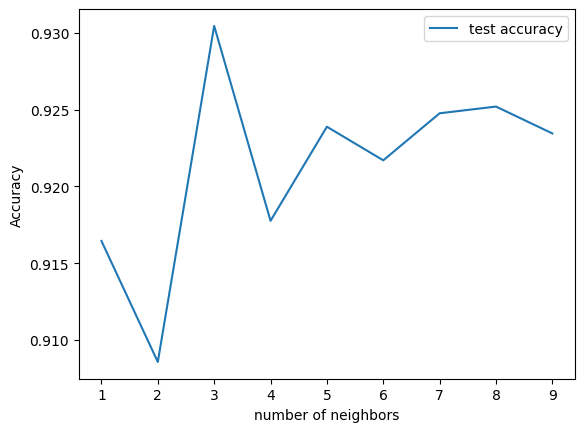

In [ ]:
# plt.plot(neighbors,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")
# plt.legend()
# plt.show()

In [ ]:
# print ("Accuracy of knn classifier: ", max(test_accuracy)*100)

Accuracy of knn classifier:  93.04461942257218


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

In [ ]:
knn = grid_knn.best_estimator_
knn_model = knn.fit(X_train,y_train.values.ravel())

In [ ]:
#print ("Accuracy of knn classifier: ", max(test_accuracy)*100)
knn_predict = knn_model.predict(X_test)

In [ ]:
print('The accuracy of knn Classifier is: ', 100.0 * accuracy_score(y_test, knn_predict))

In [ ]:
print(classification_report(y_test, knn_predict))

In [ ]:
print("Confusion Matrix of knn :\n",confusion_matrix(y_test, knn_predict))

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel= 'rbf', gamma = 0.1, C = 30)
svc_model = svc.fit(X_train,y_train.values.ravel())

In [ ]:
svc_predict = svc_model.predict(X_test)

In [ ]:
print('The accuracy of svc Classifier is: ', 100.0 * accuracy_score(y_test, svc_predict))

The accuracy of svc Classifier is:  95.45056867891513


In [ ]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1143
           1       0.96      0.95      0.95      1143

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 20, 30],
# 			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
# 			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())


In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)
# #print(grid.best_score_)

In [ ]:
# grid_predictions = grid.predict(X_test)

# # print classification report
# print(classification_report(y_test, grid_predictions))


In [ ]:
##nusvc 
from sklearn.svm import NuSVC

nusvc = NuSVC(kernel = 'rbf',gamma = 0.2, nu = 0.1)
nusvc_model = nusvc.fit(X_train, y_train.values.ravel())


In [ ]:
nusvc_predict = nusvc_model.predict(X_test)

In [ ]:
print('The accuracy of nusvc Classifier is: ', 100.0 * accuracy_score(y_test, nusvc_predict))

The accuracy of nusvc Classifier is:  95.71303587051618


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'nu': [0.1, 0.5],
# 			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
# 			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

# grid = GridSearchCV(NuSVC(), param_grid, refit = True, verbose = 3)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)
# print(grid.best_score_)

In [ ]:
# grid_predictions = grid.predict(X_test)

# # print classification report
# print(classification_report(y_test, grid_predictions))

In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(dual = False, C = 30, loss = 'squared_hinge', penalty = 'l1',tol = 0.01)
lsvc_model = lsvc.fit(X_train, y_train.values.ravel())

In [ ]:
lsvc_predict = lsvc_model.predict(X_test)

In [ ]:
print('The accuracy of lsvc Classifier is: ', 100.0 * accuracy_score(y_test, lsvc_predict))

The accuracy of lsvc Classifier is:  94.61942257217848


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 20, 30],
# 			'penalty': ['l1', 'l2'],
# 			'loss': ['squared_hinge'],
# 			'dual': [False],
# 			'tol': [.1,.01,.001]}

# grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3,)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)
# print(grid.best_score_)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(n_estimators=300,learning_rate=1)
abc_model=abc.fit(X_train,y_train.values.ravel())

In [ ]:
adc_predict = abc_model.predict(X_test)

In [ ]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,y_test))

The accuracy of Ada Boost Classifier is:  95.18810148731409


In [ ]:
# from sklearn.model_selection import GridSearchCV
# #Creating a grid of hyperparameters
# grid_params = {    'n_estimators': [100,200,300]}
# #Building a 3 fold CV GridSearchCV 
# objectgrid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
# #Fitting the grid to the training 
# datagrid_object.fit(X_train, y_train)
# #Extracting the best parameters
# grid_object.bestparams

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'n_estimators': [40,50,100,200,300]}

# grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())


In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)
# print(grid.best_score_)

In [ ]:
# ## encoding the categorical features
# from sklearn import preprocessing

# lab_en= preprocessing.LabelEncoder()

# #X_train_1 = lab_en.fit_transform(X_train.values.ravel())
# #X_test_1 = lab_en.fit_transform(X_test.values.ravel())
# y_train_1 = lab_en.fit_transform(y_train.values.ravel())
# y_test_1 = lab_en.fit_transform(y_test.values.ravel())

In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier(gamma = .1,   n_estimators = 150)
xgb_model=xgb.fit(X_train,y_train)

In [ ]:
xgb_predict=xgb_model.predict(X_test)

In [ ]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,y_test))

The accuracy of XGBoost Classifier is:  97.11286089238845


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    "gamma": [.1],
    "n_estimators": [50,100,150,200,250]
}

grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, cv=10, n_jobs= -1)

# fitting the model for grid search
grid.fit(X_train, y_train.values.ravel())


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [102]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'gamma': 0.1, 'n_estimators': 150}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9702542119548972


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 250)
gbc_model = gbc.fit(X_train,y_train.values.ravel())

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [ ]:
gbc_predict = gbc_model.predict(X_test)

In [ ]:
print('The accuracy of GradientBoost Classifier is: ' , 100.0 * accuracy_score(gbc_predict,y_test))

The accuracy of GradientBoost Classifier is:  96.71916010498688


In [ ]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(gbc,X,y.values.ravel(),cv=10)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {
#     "learning_rate": [.1,.5,1],
#     "n_estimators": [50,100,150,200,250]
# }

# grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3,)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# #print(grid.best_estimator_)
# print(grid.best_score_)

In [ ]:
# gbc_model.get_params().keys()

In [ ]:
# import inspect
# import sklearn
# import xgboost

# models = [xgboost.XGBClassifier]
# for m in models:
#     hyperparams = inspect.signature(m.__init__)
#     print(hyperparams)
# #or
# xgb_model.get_params().keys()


In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(n_estimators=100)
bag_model = bag.fit(X_train, y_train.values.ravel())


In [ ]:
bag_predict = bag_model.predict(X_test)

In [ ]:
print('The accuracy of Bagging Classifier is: ' , 100.0 * accuracy_score(bag_predict,y_test))

The accuracy of Bagging Classifier is:  95.84426946631672


In [ ]:
# bag_model.get_params()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {
#     "base_estimator": [SVC()],
#     "n_estimators": [50,100,150,200,250]
# }

# grid = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = 3,)

# # fitting the model for grid search
# grid.fit(X_train, y_train.values.ravel())

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# #print(grid.best_estimator_)
# print(grid.best_score_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train,y_train.values.ravel())


In [ ]:
rfc_model.score(X_test,y_test)

0.9650043744531933

In [ ]:
rfc_predict = rfc_model.predict(X_test)

In [ ]:
print('The accuracy of RandomForest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of RandomForest Classifier is:  96.50043744531933


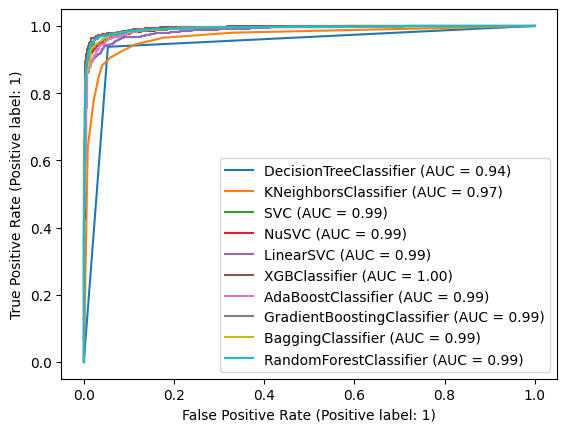

In [ ]:

estimators = [dt_model,knn_model,svc_model,nusvc_model,lsvc_model,xgb_model,abc_model,gbc_model,bag_model,rfc_model]

for estimator in estimators:
    RocCurveDisplay.from_estimator(estimator,X_test,y_test,ax=plt.gca())

In [ ]:
import tensorflow as tf
#from tensorflow.keras.datasets import imdb
from keras.layers import Embedding, Dense, LSTM, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
#embedding_output_dims = (X_train.shape[1])
loss_function = BinaryCrossentropy()
#max_sequence_length = (X_train.shape[1])
#num_distinct_words = (X_train.shape[1])
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# reshape from [samples, features] into [samples, timesteps, features]
timesteps = 1
X_train_reshape = X_train.values.ravel().reshape(X_train.shape[0],timesteps, X_train.shape[1])
X_test_reshape = X_test.values.ravel().reshape((X_test.shape[0],timesteps, X_test.shape[1]))

# Disable eager execution
#tf.compat.v1.disable_eager_execution()

# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
# print(x_train.shape)
# print(x_test.shape)

# Pad all sequences
# padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
# padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
def build_model_lstm():
    model = Sequential()
    #model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
    model.add(LSTM(256, input_shape = (timesteps,X_train_reshape.shape[2])))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
    return model

#from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model_lstm()
# Give a summary
keras_model.summary()

# Train the model
history = keras_model.fit(X_train_reshape, y_train.values.ravel(), batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
keras_predict = keras_model.predict(X_test_reshape)
test_results = keras_model.evaluate(X_test_reshape, y_test.values.ravel(), verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               345088    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 346,369
Trainable params: 345,857
Non-trainable params: 512
_________________________________________________________________
Epoch 1/100
58/58 [==============================] - 4s 19ms/step - loss: 0.2502 - accuracy: 0.8913 - val_loss: 0.6007 - val_accuracy: 0.8108
Epoch 2/100
58/58 [==============================] - 1s 10ms/step - loss: 0.1722 - accuracy: 0.9360 - va

In [ ]:
keras_model.output_shape

(None, 1)

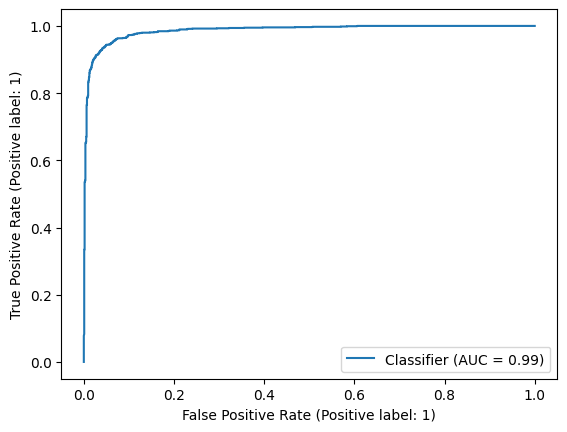

In [ ]:
RocCurveDisplay.from_predictions(y_test,keras_predict)

In [ ]:


# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import Adam
# from keras.losses import categorical_crossentropy
# # Model configuration
# #img_width, img_height = 28, 28
# batch_size = 250
# no_epochs = 25
# no_classes = 2
# validation_split = 0.2
# verbosity = 1

# # Load MNIST dataset
# #(input_train, target_train), (input_test, target_test) = mnist.load_data()

# # Reshape data 
# # input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
# # input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
# input_shape = np.expand_dims(X_train, axis=0).shape

# # Parse numbers as floats
# # input_train = input_train.astype('float32')
# # input_test = input_test.astype('float32')

# # Convert into [0, 1] range.
# # input_train = input_train / 255
# # input_test = input_test / 255

# # Convert target vectors to categorical targets
# # target_train = tensorflow.keras.utils.to_categorical(target_train, no_classes)
# # target_test = tensorflow.keras.utils.to_categorical(target_test, no_classes)

# # Create the model
# def build_model_cnn():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(256, activation='relu'))
#     model.add(Dense(no_classes, activation='softmax'))
#     # Compile the model
#     model.compile(loss=categorical_crossentropy,
#               optimizer=Adam(),
#               metrics=['accuracy'])

#     return model

# # build model
# cnn_model = build_model_cnn()


# # Fit data to model
# cnn_model.fit(X_train.values.ravel(), y_train.values.ravel(),
#           batch_size=batch_size,
#           epochs=no_epochs,
#           verbose=verbosity,
#           validation_split=validation_split)

# # Generate generalization metrics
# score = cnn_model.evaluate(X_test, y_test, verbose=0)
# print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
#np.expand_dims(X_train, axis=0).shape